<a href="https://colab.research.google.com/github/JacquelineGiPe/Repositorio_Universidad/blob/main/Actividad_4_M%C3%A9todos_de_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4 - Métodos de aprendizaje no supervisado**


*   JACQUELINE GIRALDO PELAEZ
*   BYRON STIVEN HOYOS OQUENDO


# **Definición del Problema:**
Nuestro objetivo será identificar grupos de patrones similares en el flujo de pasajeros (sin usar etiquetas) para que sea un modelo de aprendizaje no supervisado. Esto puede ayudar a encontrar horarios pico, patrones según el clima, u otros comportamientos.

Preparación del Dataset

In [ ]:
import pandas as pd
import numpy as np

# Configuración inicial
np.random.seed(42)
n_samples = 1000

# Variables simuladas
data = {
    "hora": np.random.randint(0, 24, size=n_samples), # Hora del día
    "dia_semana": np.random.choice(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], n_samples),
    "clima": np.random.choice(["Soleado", "Lluvioso", "Nublado"], n_samples),
    "evento_especial": np.random.choice([0, 1], n_samples), # 0: no, 1: sí
    "pasajeros": np.random.randint(50, 1000, size=n_samples) # Flujo de pasajeros
}

# Creamos DataFrame
df = pd.DataFrame(data)

# Exportamos el dataset convirtiendolo a formato csv
df.to_csv("transporte_masivo.csv", index=False)
print(df.head())

   hora dia_semana     clima  evento_especial  pasajeros
0     6    Domingo  Lluvioso                1        549
1    19      Lunes   Nublado                0        962
2    14     Martes   Soleado                0        158
3    10     Sábado   Soleado                1        785
4     7     Sábado   Soleado                1        327


# **Preprocesamiento**
Convertimos las variables categóricas a formato numérico para que sean útiles en el modelo.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Seleccionar columnas categóricas y numéricas
categorical_features = ["dia_semana", "clima"]
numeric_features = ["hora", "evento_especial"]

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

# Preprocesar el dataset
X = preprocessor.fit_transform(df)


In [ ]:
x = pd.DataFrame(X)
print(x.head())

    0    1    2    3    4    5    6    7    8    9         10        11
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 -0.760398  1.008032
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.059406 -0.992032
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.359481 -0.992032
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0 -0.200458  1.008032
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0 -0.620413  1.008032


# **Clustering con K-Means**

Escogimos Clustering con el algoritmo K-Means para el aprendizaje no supervisado.

Agrupamos los datos en clusters para identificar patrones.

Encontrar el número óptimo de clusters (método del codo):
Usamos el método del codo para elegir el número adecuado de grupos.

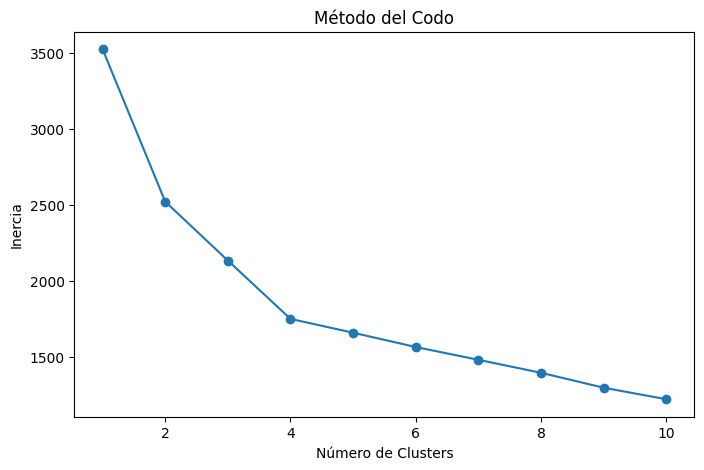

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar diferentes números de clusters (un grupo de datos que comparten características similares)
inertia = []  # suma de las distancias cuadradas entre los puntos de datos y sus respectivos centroides
range_clusters = range(1, 11)
for k in range_clusters:  # para iterar en cada cluster, del 1 al 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X) # método que entrena el modelo K-Means
    inertia.append(kmeans.inertia_) # calcula la distancia total de cada punto a su centro de cluster más cercano. Un valor bajo de inercia indica que los puntos
    #dentro de un cluster están cerca del centro del cluster, lo que sugiere un buen clustering

# Visualizar el método del codo para encontrar el número óptimo de clusters
# El "codo" en el gráfico es el punto en el que la inercia comienza a disminuir más lentamente, lo que indica que agregar más clusters no mejora significativamente el modelo.
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


# **Entrenar el modelo K-Means:**
Después de determinar el número óptimo de clusters ( en este caso, n_clusters=4), entrenamos el modelo.

In [ ]:
# Entrenar modelo con 4 clusters (ajusta según el codo)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Agregar clusters al DataFrame original como una nueva columna
df["cluster"] = clusters
print(df.head())


   hora dia_semana     clima  evento_especial  pasajeros  cluster
0     6    Domingo  Lluvioso                1        549        2
1    19      Lunes   Nublado                0        962        1
2    14     Martes   Soleado                0        158        1
3    10     Sábado   Soleado                1        785        2
4     7     Sábado   Soleado                1        327        2


# **Visualización de Resultados**


Podemos observar cómo se agrupan los datos en dos dimensiones usando PCA (técnica  de reducción de dimensionalidad).

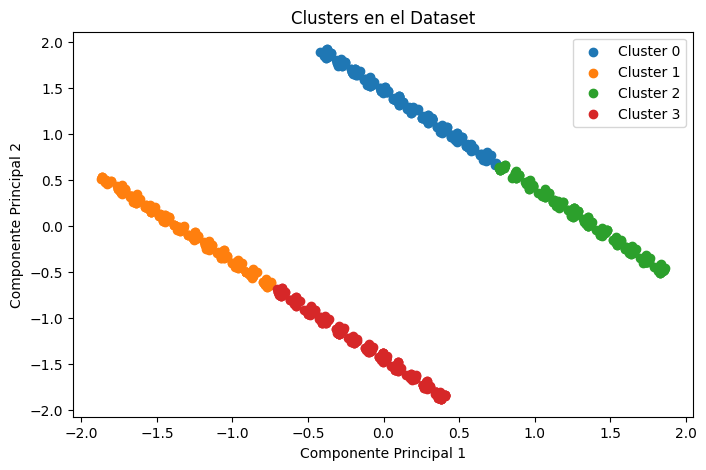

In [ ]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2) # inicializa un modelo de PCA en  2 componentes principales (2D)
X_pca = pca.fit_transform(X) #  identifica las direcciones principales de la variabilidad en los datos y Los datos originales
# en X se proyectan en los nuevos ejes calculados

# Visualizar los clusters
plt.figure(figsize=(8, 5))
for cluster in range(4):
    plt.scatter(X_pca[df["cluster"] == cluster, 0],
                X_pca[df["cluster"] == cluster, 1],
                label=f"Cluster {cluster}")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters en el Dataset")
plt.legend()
plt.show()


# **Interpretación**
Los clusters están bien diferenciados en el espacio de las componentes principales. Esto indica que los datos tienen características intrínsecas que los agrupan naturalmente en cuatro categorías o patrones diferentes.

 **Cluster 0 (Azul):** Tiene valores más altos en el eje de la Componente Principal 2 y valores intermedios en el eje de la Componente Principal 1.

**Cluster 1 (Naranja) y Cluster 3 (Rojo):** Se encuentran en una misma línea pero con menor valor en el eje de la Componente Principal 2. El cluster rojo está más hacia el centro, mientras que el naranja está más hacia el extremo izquierdo.

**Cluster 2 (Verde):** Se ubica en el cuadrante superior derecho, indicando que tiene características opuestas al cluster 1 en la Componente Principal 1.

In [ ]:
# Seleccionar solo columnas numéricas para calcular el promedio por cluster
numerical_columns = df.select_dtypes(include=["number"]).columns
cluster_summary = df.groupby("cluster")[numerical_columns].mean()

print(cluster_summary)



              hora  evento_especial   pasajeros  cluster
cluster                                                 
0        17.688259              1.0  535.538462      0.0
1        17.454198              0.0  514.362595      1.0
2         5.120482              1.0  541.534137      2.0
3         5.020661              0.0  524.768595      3.0


In [ ]:
# Contar frecuencias de variables categóricas por cluster
categorical_columns = ["dia_semana", "clima"]
for col in categorical_columns:
    print(f"\nFrecuencias de '{col}' por cluster:")
    print(df.groupby("cluster")[col].value_counts())


Frecuencias de 'dia_semana' por cluster:
cluster  dia_semana
0        Jueves        42
         Lunes         42
         Viernes       40
         Domingo       35
         Martes        32
         Miércoles     30
         Sábado        26
1        Viernes       50
         Martes        48
         Sábado        42
         Miércoles     39
         Lunes         31
         Domingo       30
         Jueves        22
2        Domingo       39
         Lunes         39
         Miércoles     38
         Sábado        36
         Jueves        35
         Viernes       34
         Martes        28
3        Miércoles     45
         Domingo       36
         Sábado        36
         Lunes         35
         Martes        33
         Viernes       29
         Jueves        28
Name: count, dtype: int64

Frecuencias de 'clima' por cluster:
cluster  clima   
0        Lluvioso    104
         Soleado      73
         Nublado      70
1        Soleado      98
         Lluvioso     89
    

# **Exportar Resultados**
Guarda el modelo y los datos etiquetados con clusters.

In [ ]:
import joblib

# Guardar modelo
joblib.dump(kmeans, "modelo_clustering_transporte.pkl")

# Guardar dataset con clusters
df.to_csv("transporte_masivo_clusterizado.csv", index=False)
